# Exploratory Data Analysis


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
ECLSK2011 = pd.read_csv('ECLSK2011.csv')

In [3]:
#0: None
#1: 8TH GRADE OR BELOW
#2: 9TH - 12TH GRADE
#3: HIGH SCHOOL DIPLOMA/EQUIVALENT
#4: VOC/TECH PROGRAM
#5: SOME COLLEGE
#6: BACHELOR'S DEGREE
#7: GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE
#8: MASTER'S DEGREE
#-9: NOT ASCERTAINED

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


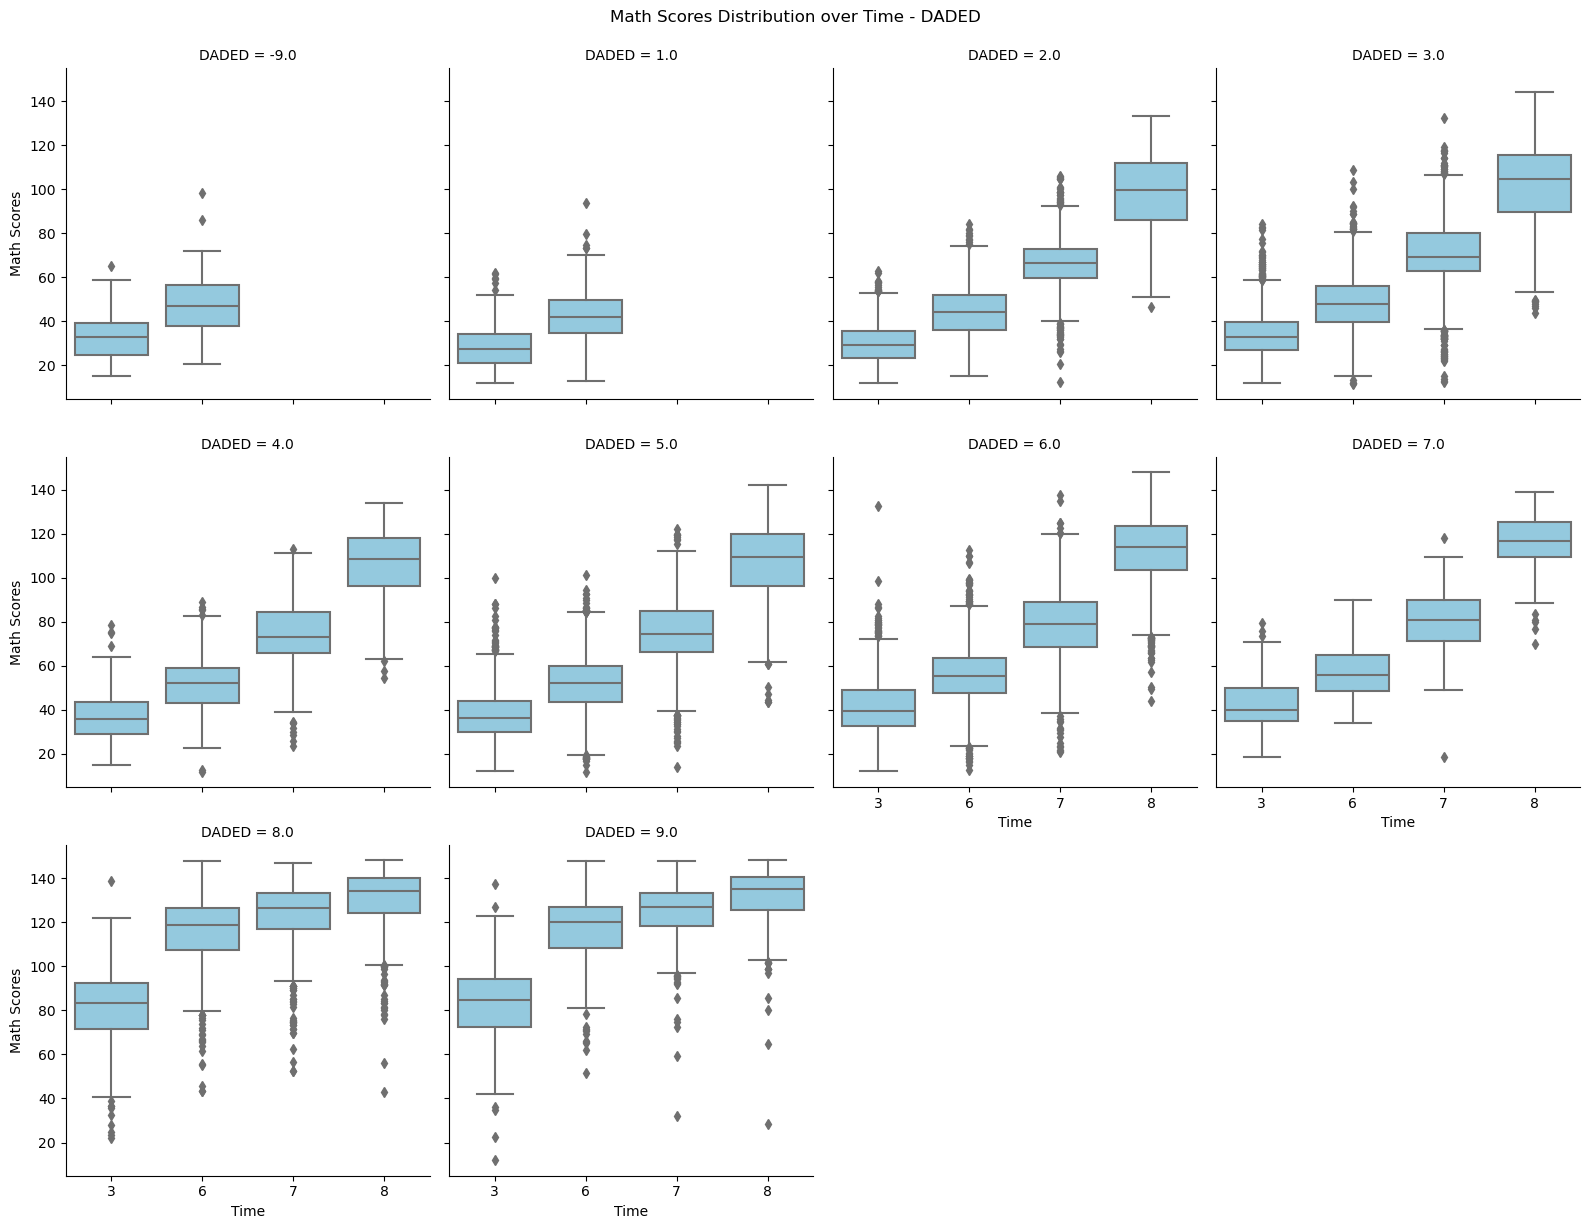

In [4]:
g = sns.FacetGrid(ECLSK2011, col="DADED", col_wrap=4, height=4)
g.map(sns.boxplot, "TIME", "MATH", color="skyblue")

# Set labels and title
g.set_axis_labels("Time", "Math Scores")
g.fig.suptitle("Math Scores Distribution over Time - DADED", y=1.02)

plt.show()

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


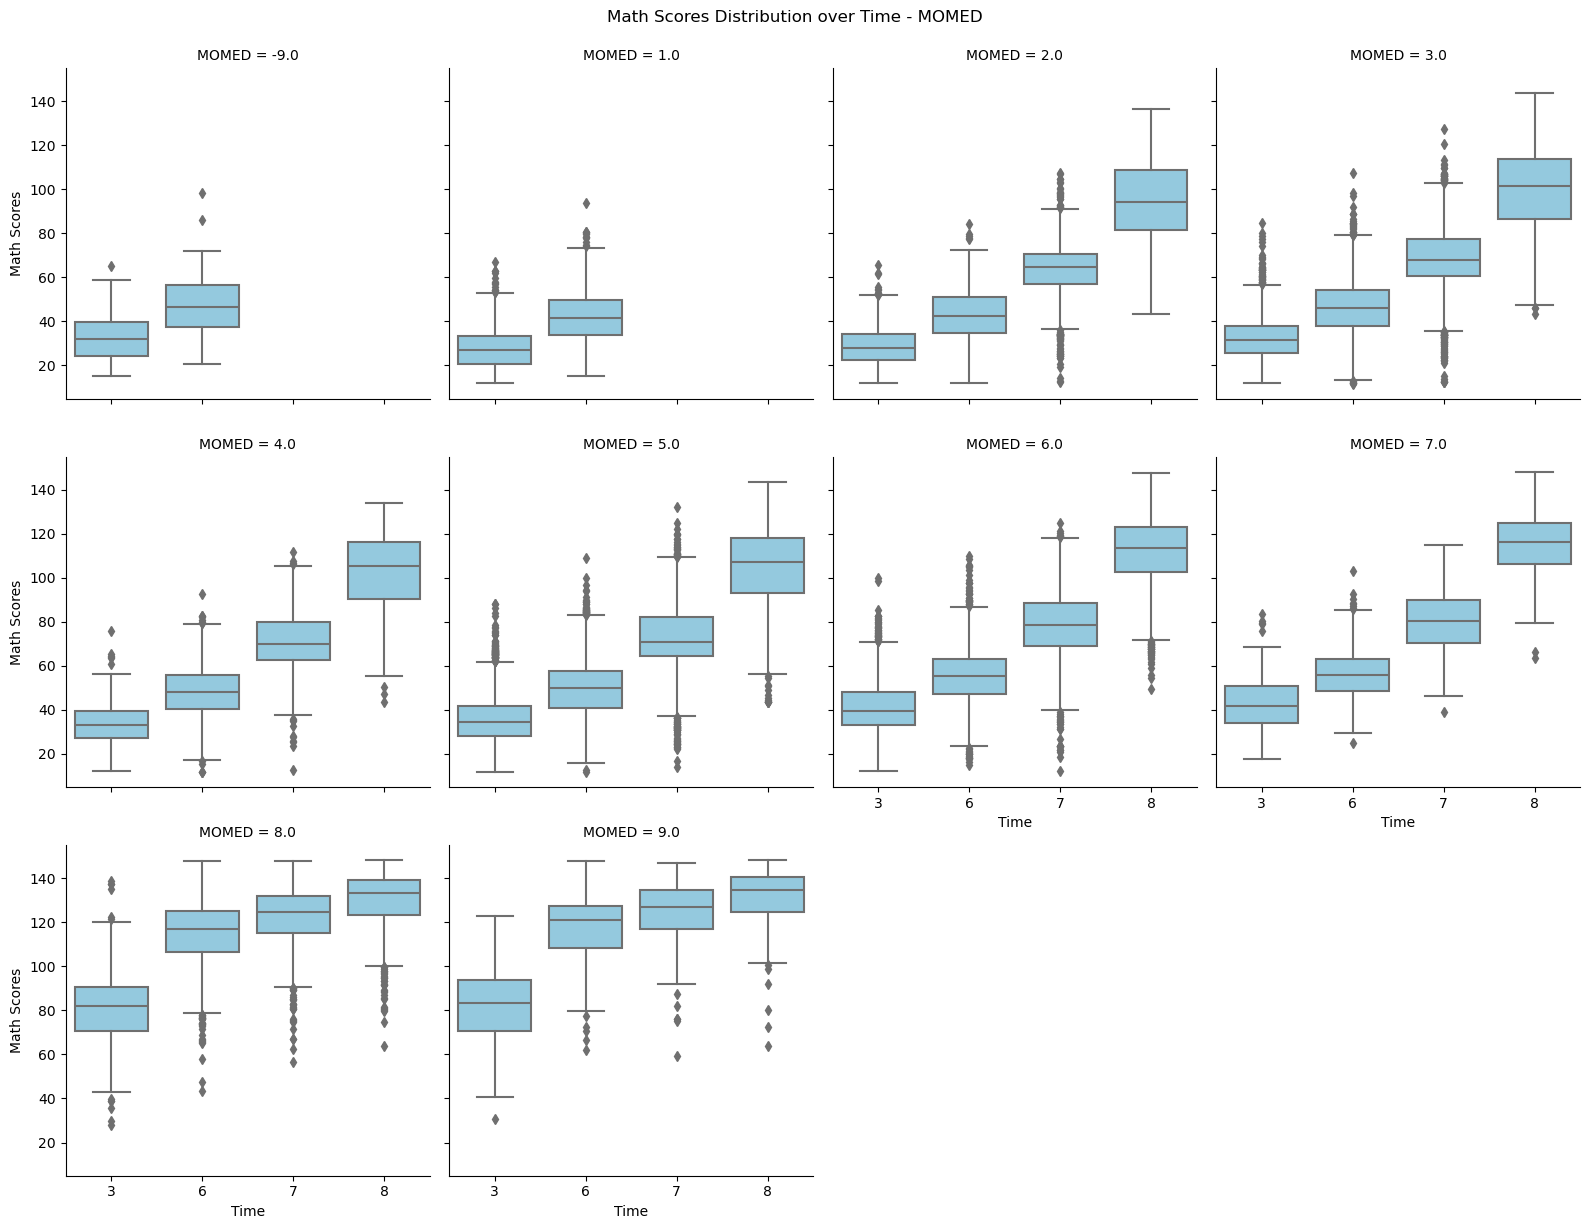

In [5]:
g = sns.FacetGrid(ECLSK2011, col="MOMED", col_wrap=4, height=4)
g.map(sns.boxplot, "TIME", "MATH", color="skyblue")

# Set labels and title
g.set_axis_labels("Time", "Math Scores")
g.fig.suptitle("Math Scores Distribution over Time - MOMED", y=1.02)

plt.show()

In [6]:
'''
# Faceted plot, but it's too dense considering there are 81 unique combinations of DADED and MOMED
ECLSK2011_filtered = ECLSK2011[['TIME', 'MATH', 'DADED', 'MOMED']]

unique_daded = ECLSK2011_filtered['DADED'].unique()
unique_momed = ECLSK2011_filtered['MOMED'].unique()

a = len(unique_daded)
b = len(unique_momed)

fig, axes = plt.subplots(a, b, figsize=(150, 150))

for i, daded in enumerate(unique_daded):
    for j, momed in enumerate(unique_momed):
        ax = axes[i, j]
        data_subset = ECLSK2011_filtered[(ECLSK2011_filtered['DADED'] == daded) & (ECLSK2011_filtered['MOMED'] == momed)]
        ax.scatter(data_subset['TIME'], data_subset['MATH'], marker='o')
        ax.set_title(f"DADED: {daded}, MOMED: {momed}")
        ax.set_xlabel('TIME')
        ax.set_ylabel('MATH')

plt.tight_layout()

plt.show()
'''

'\n# Faceted plot, but it\'s too dense considering there are 81 unique combinations of DADED and MOMED\nECLSK2011_filtered = ECLSK2011[[\'TIME\', \'MATH\', \'DADED\', \'MOMED\']]\n\nunique_daded = ECLSK2011_filtered[\'DADED\'].unique()\nunique_momed = ECLSK2011_filtered[\'MOMED\'].unique()\n\na = len(unique_daded)\nb = len(unique_momed)\n\nfig, axes = plt.subplots(a, b, figsize=(150, 150))\n\nfor i, daded in enumerate(unique_daded):\n    for j, momed in enumerate(unique_momed):\n        ax = axes[i, j]\n        data_subset = ECLSK2011_filtered[(ECLSK2011_filtered[\'DADED\'] == daded) & (ECLSK2011_filtered[\'MOMED\'] == momed)]\n        ax.scatter(data_subset[\'TIME\'], data_subset[\'MATH\'], marker=\'o\')\n        ax.set_title(f"DADED: {daded}, MOMED: {momed}")\n        ax.set_xlabel(\'TIME\')\n        ax.set_ylabel(\'MATH\')\n\nplt.tight_layout()\n\nplt.show()\n'